In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✅ Imports successful")

✅ Imports successful


In [2]:
from sklearn.datasets import fetch_california_housing

# Load California Housing dataset
california = fetch_california_housing(as_frame=True)

# Convert to DataFrame
df = california.frame  # This includes features + target together

print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Shape: (20640, 9)

First few rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
print("Data Info:")
print(df.info())

print("\n" + "="*50)
print("Missing Values:")
print(df.isnull().sum())

print("\n" + "="*50)
print("Statistical Summary:")
print(df.describe())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Missing Values:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Statistical Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       

Price Statistics:
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64


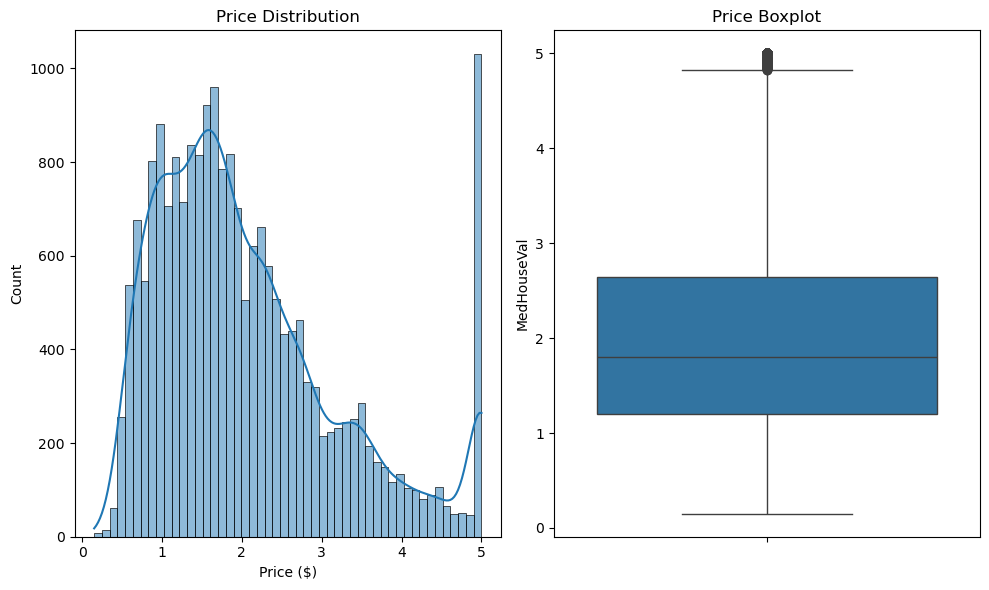

✅ Visualization saved


In [4]:
target_column = 'MedHouseVal'

print(f"Price Statistics:")
print(df[target_column].describe())

# Visualize distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[target_column], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price ($)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df[target_column])
plt.title('Price Boxplot')

plt.tight_layout()
plt.savefig('../visuals/price_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Visualization saved")

In [5]:
# Examine all columns
print("All columns:")
print(df.columns.tolist())

print("\n" + "="*50)
print("Feature descriptions:")
print("\nMedInc: Median income in block (in $10,000s)")
print("HouseAge: Median age of houses in block")
print("AveRooms: Average number of rooms per household")
print("AveBedrms: Average number of bedrooms per household")
print("Population: Block population")
print("AveOccup: Average occupancy per household")
print("Latitude: Block latitude")
print("Longitude: Block longitude")
print("MedHouseVal: Median house value (TARGET - in $100,000s)")


All columns:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']

Feature descriptions:

MedInc: Median income in block (in $10,000s)
HouseAge: Median age of houses in block
AveRooms: Average number of rooms per household
AveBedrms: Average number of bedrooms per household
Population: Block population
AveOccup: Average occupancy per household
Latitude: Block latitude
Longitude: Block longitude
MedHouseVal: Median house value (TARGET - in $100,000s)


In [6]:
# Separate features (X) from target (y)
X = df.drop('MedHouseVal', axis=1)  # All columns except target
y = df['MedHouseVal']  # Target only

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

print("\n" + "="*50)
print("Features (X) - first 3 rows:")
print(X.head(3))

print("\n" + "="*50)
print("Target (y) - first 10 values:")
print(y.head(10))


Features shape: (20640, 8)
Target shape: (20640,)

Features (X) - first 3 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  

Target (y) - first 10 values:
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
5    2.697
6    2.992
7    2.414
8    2.267
9    2.611
Name: MedHouseVal, dtype: float64


In [7]:
# Check for missing values in features and target
print("Missing values in features:")
print(X.isnull().sum())

print("\n" + "="*50)
print("Missing values in target:")
print(y.isnull().sum())


Missing values in features:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Missing values in target:
0


**The Problem:**

- If you train on ALL data, you can't test if the model works on NEW data
- Model might just memorize training examples (overfitting)

**The Solution:**

- Split data: 80% training, 20% testing
- Train model on 80%
- Test on the 20% it's never seen
- If it works on unseen data → model learned real patterns, not memorization

**Mental Model:**

Training data = study guide with answers

Test data = real exam (no answers shown during training)

In [8]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 20% for testing
    random_state=42  # Makes split reproducible
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

print("\n" + "="*50)
print(f"Training features shape: {X_train.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Test target shape: {y_test.shape}")


Training set: 16512 samples
Test set: 4128 samples

Training features shape: (16512, 8)
Training target shape: (16512,)
Test features shape: (4128, 8)
Test target shape: (4128,)


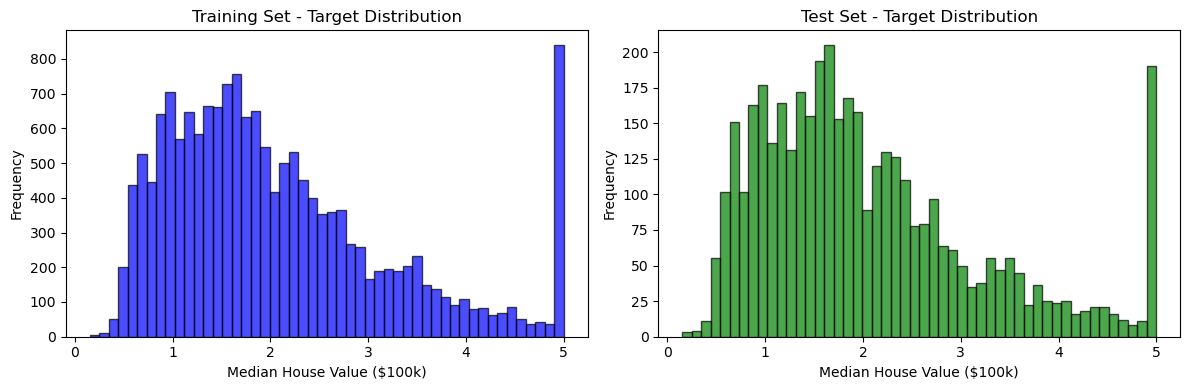

✅ Visualization saved


In [9]:
import matplotlib.pyplot as plt

# Visualize train/test split
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Training data distribution
ax1.hist(y_train, bins=50, alpha=0.7, color='blue', edgecolor='black')
ax1.set_title('Training Set - Target Distribution')
ax1.set_xlabel('Median House Value ($100k)')
ax1.set_ylabel('Frequency')

# Test data distribution
ax2.hist(y_test, bins=50, alpha=0.7, color='green', edgecolor='black')
ax2.set_title('Test Set - Target Distribution')
ax2.set_xlabel('Median House Value ($100k)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('../visuals/train_test_split.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Visualization saved")


In [10]:
from sklearn.linear_model import LinearRegression

# Create the model (just creates the structure, hasn't learned yet)
model = LinearRegression()

print("Model created (untrained):")
print(model)


Model created (untrained):
LinearRegression()


The model is just an empty structure right now - like a blank brain ready to learn
---

In [11]:
# Train the model (THIS is where learning happens)
model.fit(X_train, y_train)

print("✅ Model trained!")
print("\n" + "="*50)
print("What the model learned:")
print(f"\nIntercept (base price): ${model.intercept_:.2f} (in $100k)")
print(f"In dollars: ${model.intercept_ * 100000:,.0f}")

print("\nCoefficients (how each feature affects price):")
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"  {feature}: {coef:.4f}")


✅ Model trained!

What the model learned:

Intercept (base price): $-37.02 (in $100k)
In dollars: $-3,702,328

Coefficients (how each feature affects price):
  MedInc: 0.4487
  HouseAge: 0.0097
  AveRooms: -0.1233
  AveBedrms: 0.7831
  Population: -0.0000
  AveOccup: -0.0035
  Latitude: -0.4198
  Longitude: -0.4337


In [12]:
# Make predictions on test set
y_pred = model.predict(X_test)

print("Predictions made!")
print(f"\nFirst 10 actual values:")
print(y_test.head(10).values)

print(f"\nFirst 10 predictions:")
print(y_pred[:10])

print("\n" + "="*50)
print("Comparison (first 5):")
for i in range(5):
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    diff = abs(actual - predicted)
    print(f"Actual: ${actual:.2f} ($100k) | Predicted: ${predicted:.2f} ($100k) | Diff: ${diff:.2f} ($100k)")


Predictions made!

First 10 actual values:
[0.477   0.458   5.00001 2.186   2.78    1.587   1.982   1.575   3.4
 4.466  ]

First 10 predictions:
[0.71912284 1.76401657 2.70965883 2.83892593 2.60465725 2.01175367
 2.64550005 2.16875532 2.74074644 3.91561473]

Comparison (first 5):
Actual: $0.48 ($100k) | Predicted: $0.72 ($100k) | Diff: $0.24 ($100k)
Actual: $0.46 ($100k) | Predicted: $1.76 ($100k) | Diff: $1.31 ($100k)
Actual: $5.00 ($100k) | Predicted: $2.71 ($100k) | Diff: $2.29 ($100k)
Actual: $2.19 ($100k) | Predicted: $2.84 ($100k) | Diff: $0.65 ($100k)
Actual: $2.78 ($100k) | Predicted: $2.60 ($100k) | Diff: $0.18 ($100k)


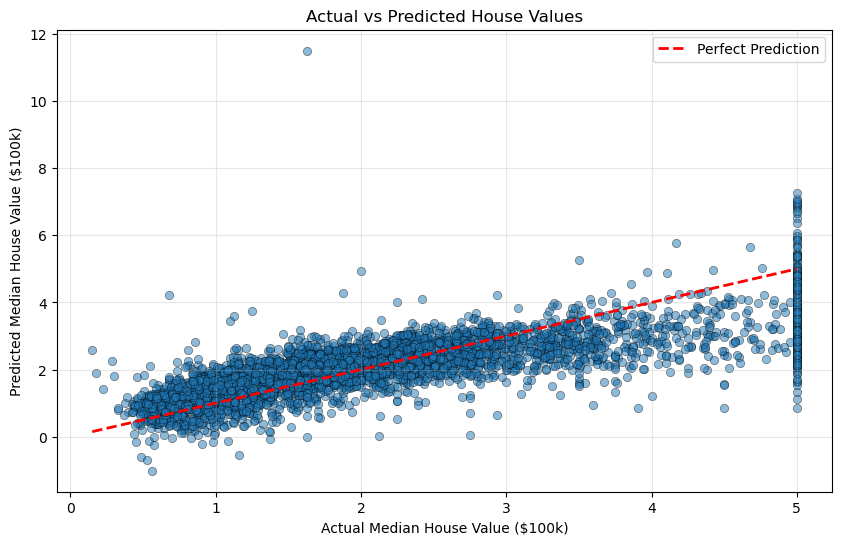

✅ Visualization saved


In [13]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k', linewidth=0.5)

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Median House Value ($100k)')
plt.ylabel('Predicted Median House Value ($100k)')
plt.title('Actual vs Predicted House Values')
plt.legend()
plt.grid(True, alpha=0.3)

plt.savefig('../visuals/actual_vs_predicted.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Visualization saved")


In [14]:
from sklearn.metrics import r2_score

# Calculate R² score
r2 = model.score(X_test, y_test)  # Same as r2_score(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print("\nInterpretation:")
print(f"The model explains {r2*100:.2f}% of the variance in house prices")

if r2 > 0.7:
    print("✅ Good model!")
elif r2 > 0.5:
    print("⚠️ Decent model, room for improvement")
else:
    print("❌ Weak model, needs work")


R² Score: 0.5758

Interpretation:
The model explains 57.58% of the variance in house prices
⚠️ Decent model, room for improvement


**R² = how much of price variation the model explains. 1.0 = perfect, 0.0 = useless**

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# import numpy as np

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Error Metrics:")
print(f"\nMean Absolute Error (MAE): ${mae:.4f} ($100k)")
print(f"In dollars: ${mae * 100000:,.0f}")
print("→ On average, predictions are off by this amount")

print(f"\nRoot Mean Squared Error (RMSE): ${rmse:.4f} ($100k)")
print(f"In dollars: ${rmse * 100000:,.0f}")
print("→ Penalizes large errors more than MAE")


Error Metrics:

Mean Absolute Error (MAE): $0.5332 ($100k)
In dollars: $53,320
→ On average, predictions are off by this amount

Root Mean Squared Error (RMSE): $0.7456 ($100k)
In dollars: $74,558
→ Penalizes large errors more than MAE


In [16]:
# Model Performance Summary
print("="*50)
print("MODEL PERFORMANCE SUMMARY")
print("="*50)

print(f"\nDataset: California Housing")
print(f"  Training samples: {X_train.shape[0]:,}")
print(f"  Test samples: {X_test.shape[0]:,}")
print(f"  Features used: {X_train.shape[1]}")

print(f"\nPerformance Metrics:")
print(f"  R² Score: {r2:.4f} ({r2*100:.1f}% variance explained)")
print(f"  Mean Absolute Error: ${mae * 100000:,.0f}")
print(f"  Root Mean Squared Error: ${rmse * 100000:,.0f}")

print(f"\nTop 3 Most Important Features:")
feature_importance = sorted(zip(X_train.columns, abs(model.coef_)),
                            key=lambda x: x[1], reverse=True)
for i, (feature, importance) in enumerate(feature_importance[:3], 1):
    print(f"  {i}. {feature}: {importance:.4f}")


MODEL PERFORMANCE SUMMARY

Dataset: California Housing
  Training samples: 16,512
  Test samples: 4,128
  Features used: 8

Performance Metrics:
  R² Score: 0.5758 (57.6% variance explained)
  Mean Absolute Error: $53,320
  Root Mean Squared Error: $74,558

Top 3 Most Important Features:
  1. AveBedrms: 0.7831
  2. MedInc: 0.4487
  3. Longitude: 0.4337


In [17]:
# Calculate residuals
residuals = y_test - y_pred

print("Residual Statistics:")
print(f"Mean residual: {residuals.mean():.4f} (should be ~0)")
print(f"Std dev of residuals: {residuals.std():.4f}")
print(f"Min residual: {residuals.min():.4f} (worst underprediction)")
print(f"Max residual: {residuals.max():.4f} (worst overprediction)")

print("\n" + "="*50)
print("First 10 residuals:")
for i in range(10):
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    residual = residuals.iloc[i]
    print(f"Actual: ${actual:.2f} | Pred: ${predicted:.2f} | Error: ${residual:.2f}")


Residual Statistics:
Mean residual: 0.0035 (should be ~0)
Std dev of residuals: 0.7457
Min residual: -9.8753 (worst underprediction)
Max residual: 4.1484 (worst overprediction)

First 10 residuals:
Actual: $0.48 | Pred: $0.72 | Error: $-0.24
Actual: $0.46 | Pred: $1.76 | Error: $-1.31
Actual: $5.00 | Pred: $2.71 | Error: $2.29
Actual: $2.19 | Pred: $2.84 | Error: $-0.65
Actual: $2.78 | Pred: $2.60 | Error: $0.18
Actual: $1.59 | Pred: $2.01 | Error: $-0.42
Actual: $1.98 | Pred: $2.65 | Error: $-0.66
Actual: $1.57 | Pred: $2.17 | Error: $-0.59
Actual: $3.40 | Pred: $2.74 | Error: $0.66
Actual: $4.47 | Pred: $3.92 | Error: $0.55


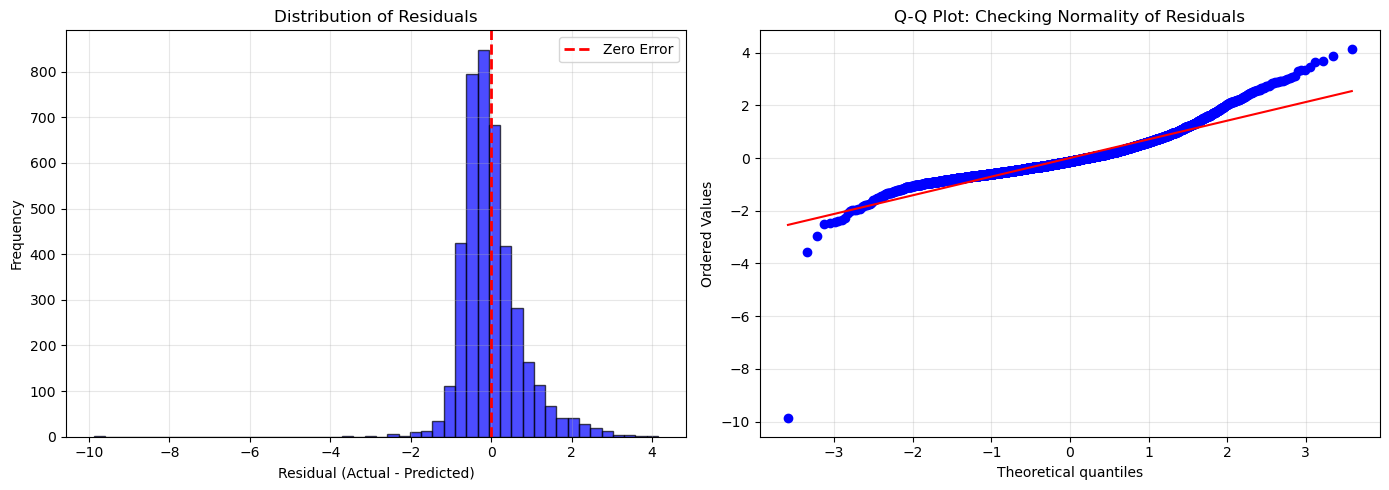

✅ Visualization saved


In [18]:
# import matplotlib.pyplot as plt
# import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of residuals
axes[0].hist(residuals, bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[0].set_xlabel('Residual (Actual - Predicted)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Residuals')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Q-Q plot (checking if residuals are normally distributed)
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot: Checking Normality of Residuals')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../visuals/residual_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Visualization saved")


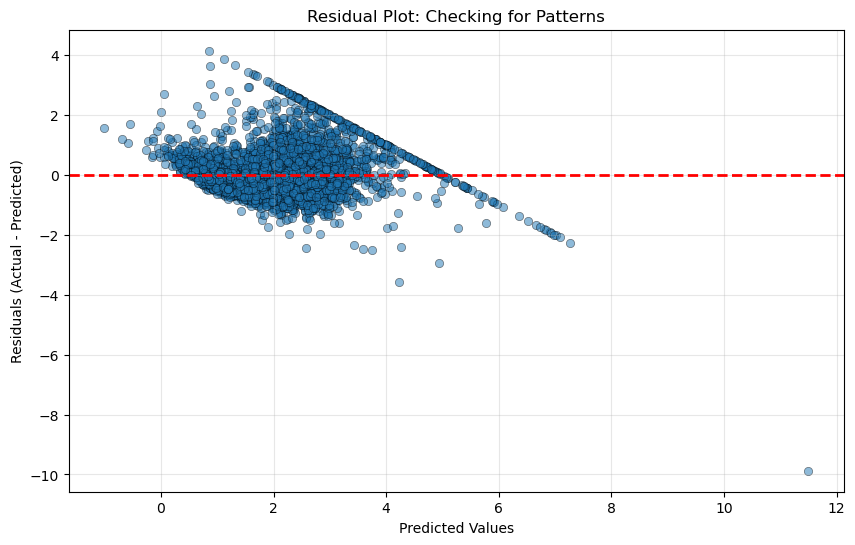

✅ Visualization saved

What to look for:
✅ Good: Random scatter around zero (no pattern)
❌ Bad: Cone shape (heteroscedasticity)
❌ Bad: Curve pattern (non-linear relationship)
❌ Bad: Systematic over/under prediction in ranges


In [19]:
# Residuals vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot: Checking for Patterns')
plt.grid(True, alpha=0.3)

plt.savefig('../visuals/residual_plot.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Visualization saved")
print("\nWhat to look for:")
print("✅ Good: Random scatter around zero (no pattern)")
print("❌ Bad: Cone shape (heteroscedasticity)")
print("❌ Bad: Curve pattern (non-linear relationship)")
print("❌ Bad: Systematic over/under prediction in ranges")


In [20]:
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# import numpy as np

# Make predictions on TRAINING data (data model was trained on)
y_train_pred = model.predict(X_train)

# Calculate metrics for both training and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("="*50)
print("TRAINING vs TEST PERFORMANCE")
print("="*50)

print(f"\nR² Score:")
print(f"  Training: {train_r2:.4f}")
print(f"  Test:     {test_r2:.4f}")
print(f"  Difference: {abs(train_r2 - test_r2):.4f}")

print(f"\nMean Absolute Error:")
print(f"  Training: ${train_mae * 100000:,.0f}")
print(f"  Test:     ${test_mae * 100000:,.0f}")

print(f"\nRoot Mean Squared Error:")
print(f"  Training: ${train_rmse * 100000:,.0f}")
print(f"  Test:     ${test_rmse * 100000:,.0f}")


TRAINING vs TEST PERFORMANCE

R² Score:
  Training: 0.6126
  Test:     0.5758
  Difference: 0.0368

Mean Absolute Error:
  Training: $52,863
  Test:     $53,320

Root Mean Squared Error:
  Training: $71,968
  Test:     $74,558


In [21]:
print("="*50)
print("OVERFITTING vs UNDERFITTING GUIDE")
print("="*50)

print("\n🎯 PERFECT FIT (What we want):")
print("  - Training R²: ~0.65")
print("  - Test R²: ~0.63")
print("  - Difference: <0.05")
print("  → Model learned real patterns, generalizes well")

print("\n❌ OVERFITTING (Memorized training data):")
print("  - Training R²: 0.95")
print("  - Test R²: 0.50")
print("  - Difference: 0.45 (LARGE)")
print("  → Model memorized training examples, doesn't generalize")

print("\n❌ UNDERFITTING (Too simple):")
print("  - Training R²: 0.40")
print("  - Test R²: 0.38")
print("  - Difference: 0.02 (small)")
print("  → Model too simple to capture relationships")

print("\n" + "="*50)
print("YOUR MODEL:")
print(f"  Training R²: {train_r2:.4f}")
print(f"  Test R²: {test_r2:.4f}")
print(f"  Difference: {abs(train_r2 - test_r2):.4f}")

if abs(train_r2 - test_r2) < 0.05:
    print("  ✅ Well-balanced model")
elif train_r2 > test_r2 + 0.1:
    print("  ⚠️ Possible overfitting")
else:
    print("  ⚠️ Possible underfitting")


OVERFITTING vs UNDERFITTING GUIDE

🎯 PERFECT FIT (What we want):
  - Training R²: ~0.65
  - Test R²: ~0.63
  - Difference: <0.05
  → Model learned real patterns, generalizes well

❌ OVERFITTING (Memorized training data):
  - Training R²: 0.95
  - Test R²: 0.50
  - Difference: 0.45 (LARGE)
  → Model memorized training examples, doesn't generalize

❌ UNDERFITTING (Too simple):
  - Training R²: 0.40
  - Test R²: 0.38
  - Difference: 0.02 (small)
  → Model too simple to capture relationships

YOUR MODEL:
  Training R²: 0.6126
  Test R²: 0.5758
  Difference: 0.0368
  ✅ Well-balanced model


In [22]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("5-Fold Cross-Validation Results:")
print("="*50)
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: R² = {score:.4f}")

print("\n" + "="*50)
print(f"Mean R²: {cv_scores.mean():.4f}")
print(f"Std Dev: {cv_scores.std():.4f}")
print(f"Range: {cv_scores.min():.4f} to {cv_scores.max():.4f}")

print("\n" + "="*50)
print("Interpretation:")
print(f"  - Model typically explains {cv_scores.mean()*100:.1f}% of variance")
print(f"  - Performance varies by ±{cv_scores.std()*100:.1f}%")
if cv_scores.std() < 0.05:
    print("  ✅ Consistent performance across folds")
else:
    print("  ⚠️ Performance varies significantly across folds")


5-Fold Cross-Validation Results:
Fold 1: R² = 0.5487
Fold 2: R² = 0.4682
Fold 3: R² = 0.5508
Fold 4: R² = 0.5370
Fold 5: R² = 0.6605

Mean R²: 0.5530
Std Dev: 0.0617
Range: 0.4682 to 0.6605

Interpretation:
  - Model typically explains 55.3% of variance
  - Performance varies by ±6.2%
  ⚠️ Performance varies significantly across folds


In [23]:
# Compare our original test score with cross-validation mean
print("="*50)
print("SINGLE SPLIT vs CROSS-VALIDATION")
print("="*50)

print(f"\nSingle Test Set R²: {test_r2:.4f}")
print(f"Cross-Validation Mean R²: {cv_scores.mean():.4f}")
print(f"Difference: {abs(test_r2 - cv_scores.mean()):.4f}")

print("\n✅ Cross-validation gives more reliable estimate")
print("✅ Use CV for model comparison and tuning")
print("✅ Use single test set for final evaluation")


SINGLE SPLIT vs CROSS-VALIDATION

Single Test Set R²: 0.5758
Cross-Validation Mean R²: 0.5530
Difference: 0.0228

✅ Cross-validation gives more reliable estimate
✅ Use CV for model comparison and tuning
✅ Use single test set for final evaluation


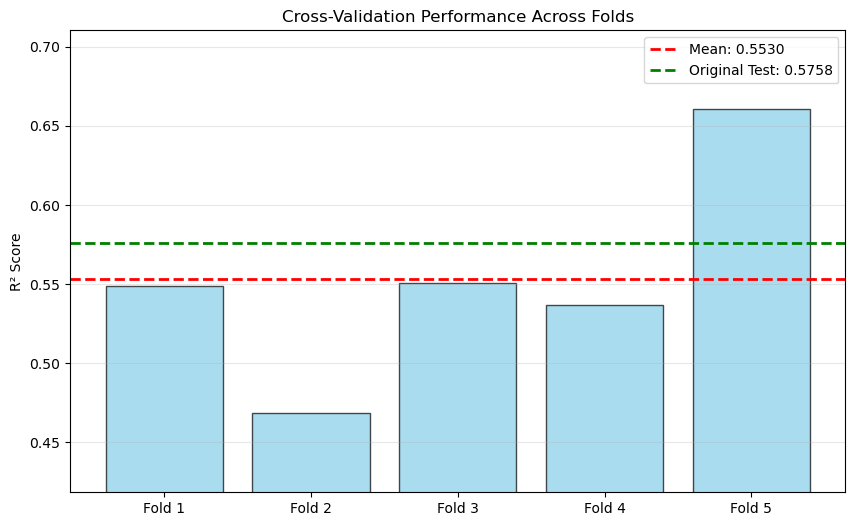

✅ Visualization saved


In [24]:
# Visualize CV scores
plt.figure(figsize=(10, 6))
folds = [f'Fold {i}' for i in range(1, 6)]
plt.bar(folds, cv_scores, alpha=0.7, color='skyblue', edgecolor='black')
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--',
            linewidth=2, label=f'Mean: {cv_scores.mean():.4f}')
plt.axhline(y=test_r2, color='green', linestyle='--',
            linewidth=2, label=f'Original Test: {test_r2:.4f}')
plt.ylabel('R² Score')
plt.title('Cross-Validation Performance Across Folds')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.ylim([cv_scores.min() - 0.05, cv_scores.max() + 0.05])

plt.savefig('../visuals/cross_validation_scores.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Visualization saved")


In [25]:
# Create feature importance dataframe
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("="*50)
print("FEATURE IMPORTANCE (by coefficient magnitude)")
print("="*50)
print(feature_importance.to_string(index=False))

print("\n" + "="*50)
print("Interpretation:")
print("- Larger absolute coefficient = bigger impact on prediction")
print("- Positive coefficient = increases price")
print("- Negative coefficient = decreases price")


FEATURE IMPORTANCE (by coefficient magnitude)
   Feature  Coefficient  Abs_Coefficient
 AveBedrms     0.783145         0.783145
    MedInc     0.448675         0.448675
 Longitude    -0.433708         0.433708
  Latitude    -0.419792         0.419792
  AveRooms    -0.123323         0.123323
  HouseAge     0.009724         0.009724
  AveOccup    -0.003526         0.003526
Population    -0.000002         0.000002

Interpretation:
- Larger absolute coefficient = bigger impact on prediction
- Positive coefficient = increases price
- Negative coefficient = decreases price


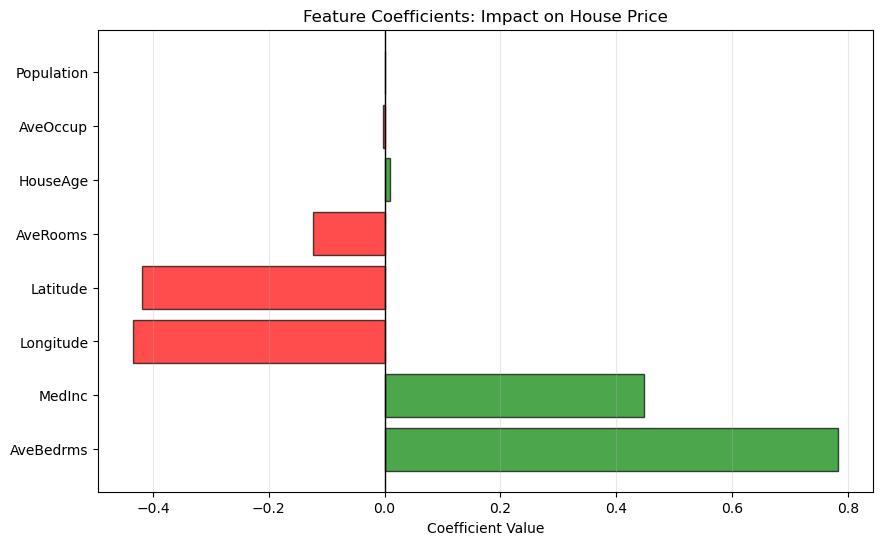

✅ Visualization saved

Green = increases price | Red = decreases price


In [26]:
# Bar plot of coefficients
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in feature_importance['Coefficient']]
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'],
         color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients: Impact on House Price')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(True, alpha=0.3, axis='x')

plt.savefig('../visuals/feature_coefficients.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Visualization saved")
print("\nGreen = increases price | Red = decreases price")


Examining top feature: AveBedrms


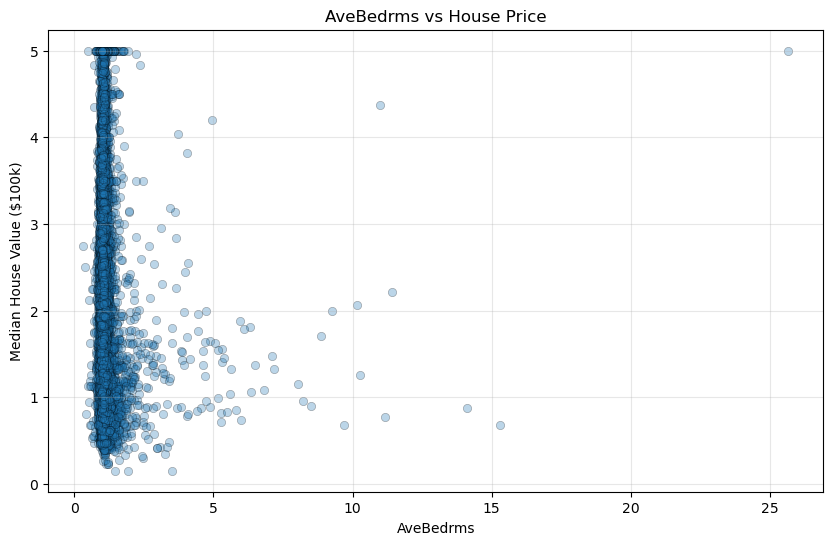


Correlation with price: -0.0514


In [27]:
# Look at relationship between top feature and target
top_feature = feature_importance.iloc[0]['Feature']
print(f"Examining top feature: {top_feature}")

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train[top_feature], y_train, alpha=0.3, edgecolors='k', linewidth=0.5)
plt.xlabel(top_feature)
plt.ylabel('Median House Value ($100k)')
plt.title(f'{top_feature} vs House Price')
plt.grid(True, alpha=0.3)

plt.savefig(f'../visuals/{top_feature}_vs_price.png', dpi=150, bbox_inches='tight')
plt.show()

# Calculate correlation
correlation = X_train[top_feature].corr(y_train)
print(f"\nCorrelation with price: {correlation:.4f}")


In [28]:
print("="*50)
print("BIAS-VARIANCE TRADEOFF")
print("="*50)

print("\n📊 BIAS (Underfitting):")
print("  - Model too simple")
print("  - Can't capture true patterns")
print("  - Low training accuracy AND low test accuracy")
print("  - Example: Using only 1 feature when you need 8")

print("\n🎯 VARIANCE (Overfitting):")
print("  - Model too complex")
print("  - Memorizes training noise")
print("  - High training accuracy BUT low test accuracy")
print("  - Example: Using 1000 features for 100 samples")

print("\n✅ THE SWEET SPOT:")
print("  - Model complexity matches problem complexity")
print("  - Good training accuracy AND good test accuracy")
print("  - Small gap between training and test performance")

print("\n" + "="*50)
print("In Linear Regression:")
print("  - Bias/Variance controlled mainly by:")
print("    1. Feature selection (which features to use)")
print("    2. Feature engineering (creating new features)")
print("    3. Regularization (tomorrow's topic!)")


BIAS-VARIANCE TRADEOFF

📊 BIAS (Underfitting):
  - Model too simple
  - Can't capture true patterns
  - Low training accuracy AND low test accuracy
  - Example: Using only 1 feature when you need 8

🎯 VARIANCE (Overfitting):
  - Model too complex
  - Memorizes training noise
  - High training accuracy BUT low test accuracy
  - Example: Using 1000 features for 100 samples

✅ THE SWEET SPOT:
  - Model complexity matches problem complexity
  - Good training accuracy AND good test accuracy
  - Small gap between training and test performance

In Linear Regression:
  - Bias/Variance controlled mainly by:
    1. Feature selection (which features to use)
    2. Feature engineering (creating new features)
    3. Regularization (tomorrow's topic!)


In [29]:
# Complete diagnostic summary
print("="*50)
print("MODEL DIAGNOSTIC SUMMARY")
print("="*50)

print(f"\n1. PERFORMANCE METRICS:")
print(f"   Training R²: {train_r2:.4f}")
print(f"   Test R²: {test_r2:.4f}")
print(f"   CV Mean R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
print(f"   Test MAE: ${test_mae * 100000:,.0f}")

print(f"\n2. OVERFITTING CHECK:")
gap = train_r2 - test_r2
print(f"   Train-Test Gap: {gap:.4f}")
if gap < 0.05:
    print("   ✅ No significant overfitting")
elif gap < 0.1:
    print("   ⚠️ Slight overfitting")
else:
    print("   ❌ Significant overfitting")

print(f"\n3. RESIDUAL ANALYSIS:")
print(f"   Mean residual: {residuals.mean():.4f} (should be ~0)")
print(f"   Residual std: {residuals.std():.4f}")
print("   Check residual plot for patterns")

print(f"\n4. TOP 3 IMPORTANT FEATURES:")
for i in range(min(3, len(feature_importance))):
    feat = feature_importance.iloc[i]['Feature']
    coef = feature_importance.iloc[i]['Coefficient']
    print(f"   {i+1}. {feat}: {coef:.4f}")

print(f"\n5. OVERALL ASSESSMENT:")
if cv_scores.mean() > 0.6 and gap < 0.05:
    print("   ✅ Good baseline model")
    print("   → Next: Feature engineering to improve further")
elif cv_scores.mean() < 0.5:
    print("   ⚠️ Model underfitting")
    print("   → Need: More features or non-linear model")
else:
    print("   ⚠️ Room for improvement")
    print("   → Try: Feature engineering, regularization")


MODEL DIAGNOSTIC SUMMARY

1. PERFORMANCE METRICS:
   Training R²: 0.6126
   Test R²: 0.5758
   CV Mean R²: 0.5530 (±0.0617)
   Test MAE: $53,320

2. OVERFITTING CHECK:
   Train-Test Gap: 0.0368
   ✅ No significant overfitting

3. RESIDUAL ANALYSIS:
   Mean residual: 0.0035 (should be ~0)
   Residual std: 0.7457
   Check residual plot for patterns

4. TOP 3 IMPORTANT FEATURES:
   1. AveBedrms: 0.7831
   2. MedInc: 0.4487
   3. Longitude: -0.4337

5. OVERALL ASSESSMENT:
   ⚠️ Room for improvement
   → Try: Feature engineering, regularization
